In [5]:
from dataset import Dataset
from runner import Runner
from model_lgbm import ModelLGBM
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
prms = {
  'num_round': 10000,
  'early_stopping_rounds': 10,
  'task': 'train',
  'boosting_type': 'gbdt',
  'objective': 'regression',
  'metrics': 'huber',
  'num_leaves': 30,
  'learning_rate': 0.3,
  'verbosity': -1,
  'verbose_eval': -1,
  'verbose_early': 0,
}
features = [
    'target','最高気温', '平均気温', '最低気温', '平均湿度',
    '平均現地気圧', '平均蒸気圧', '平均雲量', '平均風速', '日照時間']
feature_name_dic = {
    'target': 'target',
    '最高気温': 'HighestTemperature',
    '平均気温': 'AverageTemperature',
    '最低気温': 'LowestTemperature',
    '平均湿度': 'AverageAirHumidity',
    '平均現地気圧': 'AverageLocalAtmoshperePressure',
    '平均蒸気圧': 'AverageVaporTension',
    '平均雲量': 'AverageCloudAmount',
    '平均風速': 'AverageWindVelocity',
    '日照時間': 'DayLength'
}
train_years = [
    #[2008, 2009],
    [2010, 2011],
    [2012, 2013],
    [2014, 2015],
    [2016, 2017],
    ]
test_years = [2018, 2019]

In [ ]:
feature_names = features.copy()
for i, name_a in enumerate(feature_names):
    if name_a == 'target':
        continue
    for j, name_b in enumerate(feature_names):
        if i >= j:
            continue
        name = feature_name_dic[name_a] + '_x_' + feature_name_dic[name_b]
        prin

[2019-11-22 21:55:40] - test - start training cv
[2019-11-22 21:55:40] - test fold 0 - start training
[2019-11-22 21:55:41] - test fold 0 - end training - score 13.440061643998458
[2019-11-22 21:55:41] - test fold 1 - start training
[2019-11-22 21:55:41] - test fold 1 - end training - score 14.841112116398016
[2019-11-22 21:55:41] - test fold 2 - start training
[2019-11-22 21:55:42] - test fold 2 - end training - score 10.073046887173616
[2019-11-22 21:55:42] - test fold 3 - start training
[2019-11-22 21:55:42] - test fold 3 - end training - score 7.427405607093412
[2019-11-22 21:55:42] - test - end training cv
name:test
	score:11.445406563665875
	score0:13.440061643998458
	score1:14.841112116398016
	score2:10.073046887173616
	score3:7.427405607093412
[2019-11-22 21:55:42] - test - start predicting cv
[2019-11-22 21:55:42] - test - start prediction fold:0
[2019-11-22 21:55:42] - test - end prediction fold:0 - score 22.912997046730986
[2019-11-22 21:55:42] - test - start prediction fold

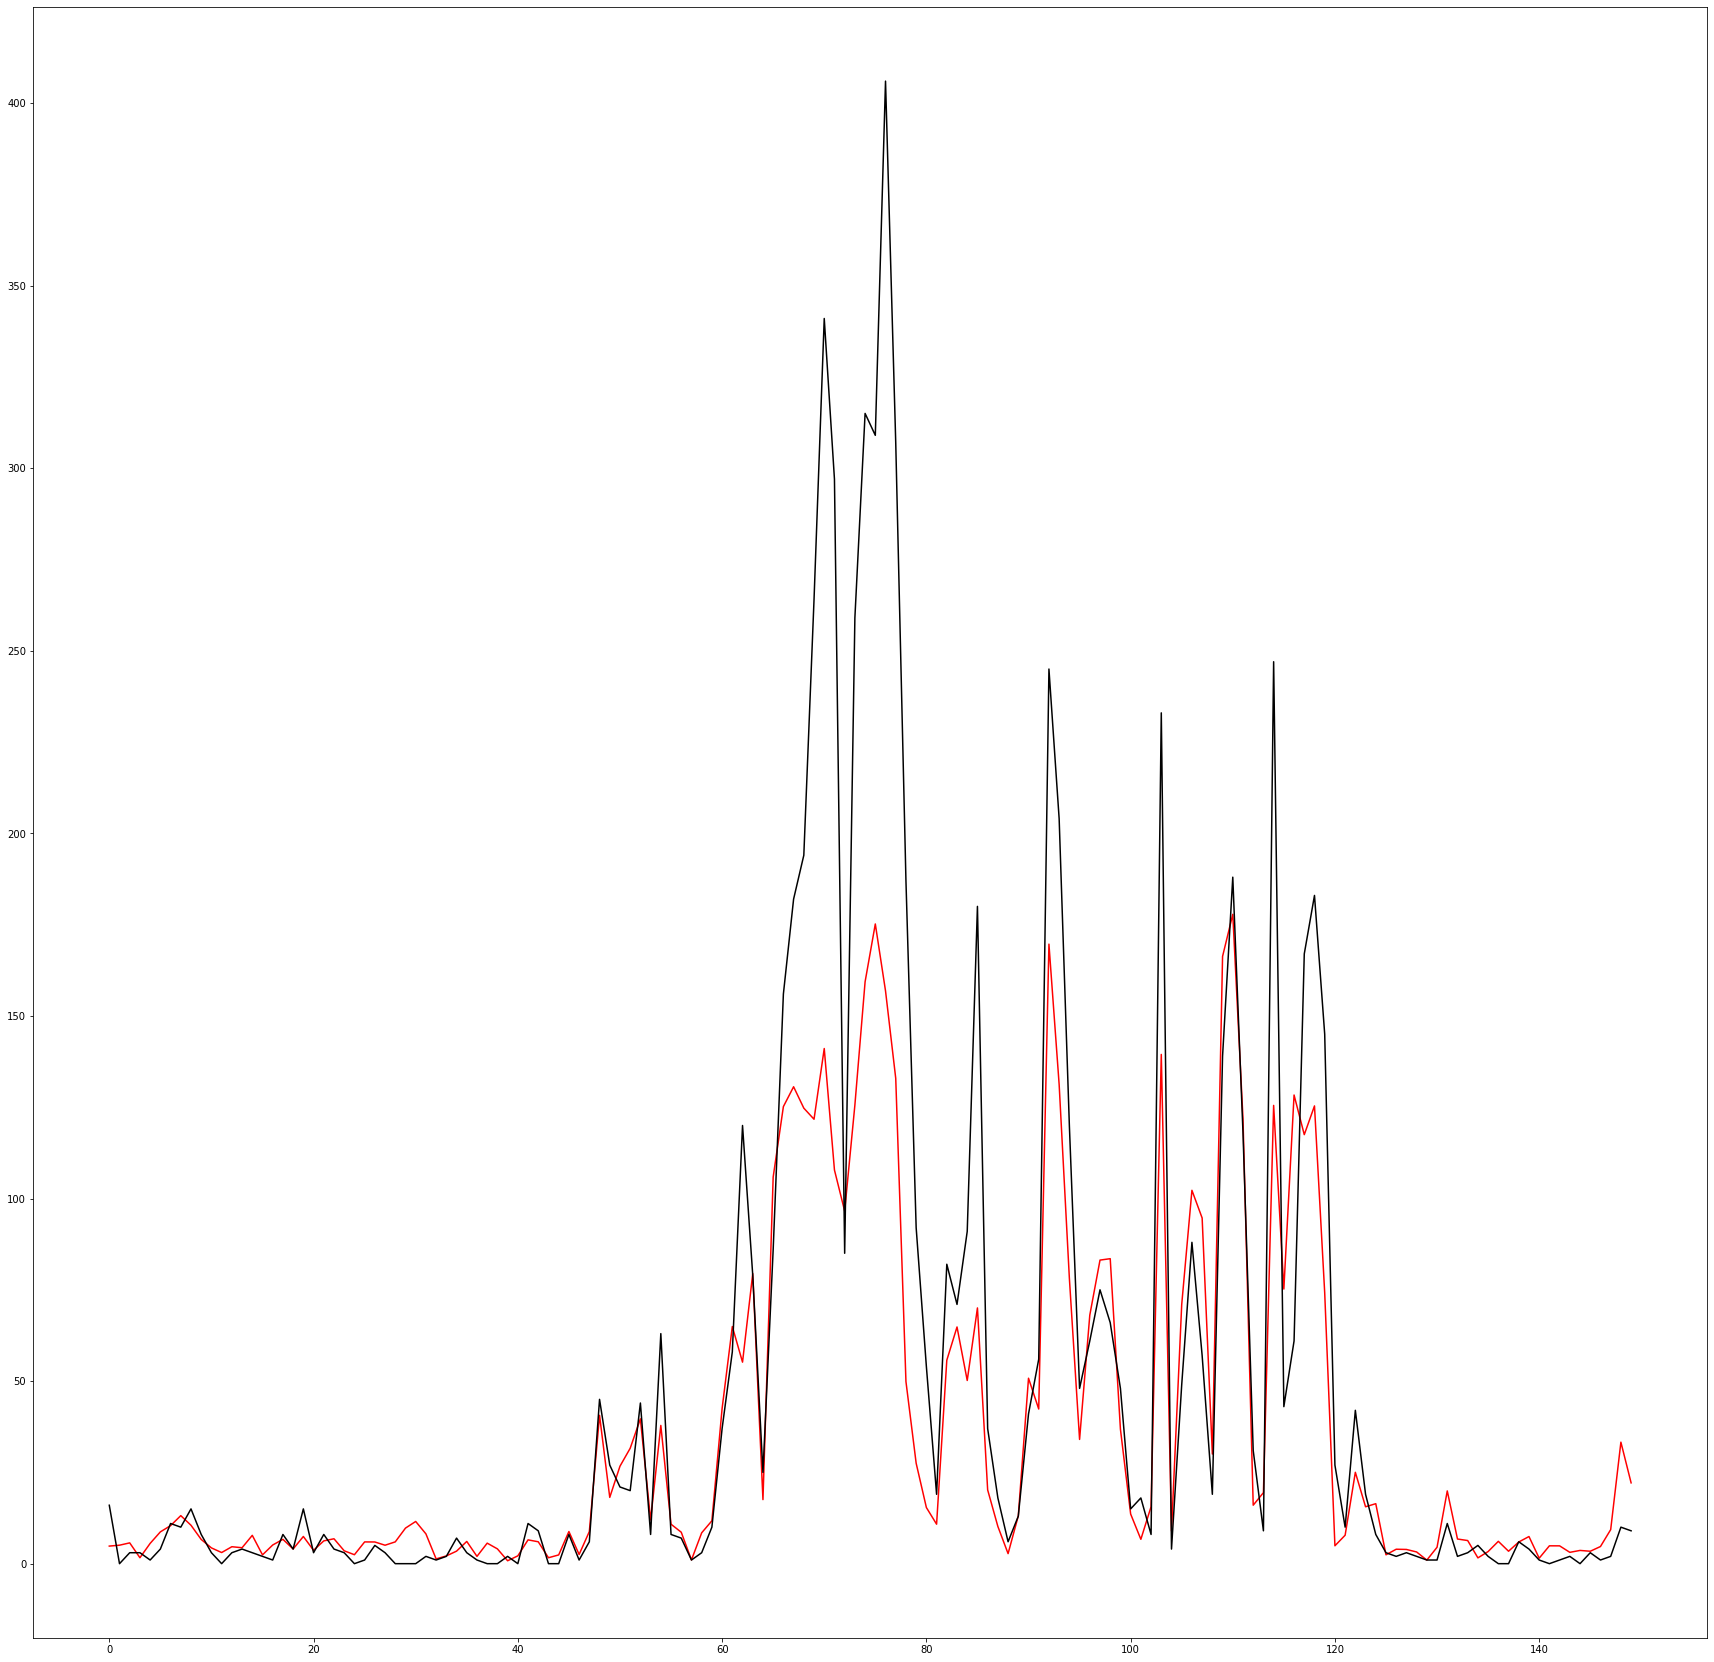

In [3]:
dataset = Dataset(features)
dataset.add_past_day_data([i for i in range(1, 4)])

runner = Runner('test', ModelLGBM, dataset, train_years, test_years, prms)

runner.run_train_cv()
runner.run_predict_cv()

%matplotlib inline
pred, correct,_ = runner.get_predict_cv()
plt.figure(figsize=(30, 30))
plt.plot(pred, color='r')
plt.plot(correct.values, color='black')
plt.show()

D:\Program Files\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20302 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27671 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Program Files\Anaconda3\envs\py37\lib\site-packages\matplotlib

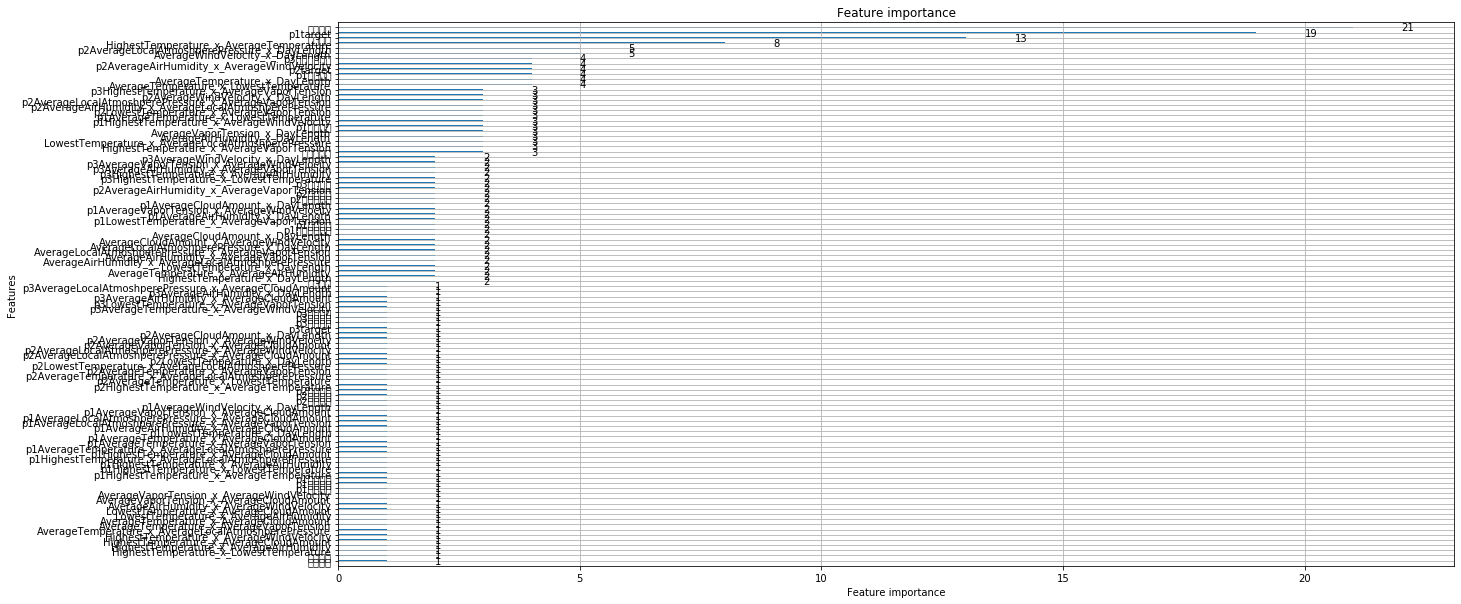

In [8]:
# 特徴量の重要度をプロットする
model = ModelLGBM('test-3', features)
model.load_model()
lgb.plot_importance(model.model, figsize=(20, 10))
plt.show()